In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train.shape)
print(x_train_flat.shape)

(60000, 28, 28)
(60000, 784)


In [6]:
# Define the MLP model
model = models.Sequential()
model.add(layers.Input(shape=(28*28,)))  # Define input shape here

# Input layer (Flatten is applied earlier)
# Hidden layer with 100 neurons, ReLU activation, L2 regularization, and Dropout
model.add(layers.Dense(100, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))  # Dropout with 30%

# Output layer with 10 neurons (one for each class), Softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7408 - loss: 0.7627 - val_accuracy: 0.8445 - val_loss: 0.4621
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8381 - loss: 0.4738 - val_accuracy: 0.8525 - val_loss: 0.4373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8509 - loss: 0.4459 - val_accuracy: 0.8603 - val_loss: 0.4232
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8605 - loss: 0.4253 - val_accuracy: 0.8481 - val_loss: 0.4424
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8647 - loss: 0.4104 - val_accuracy: 0.8553 - val_loss: 0.4442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8657 - loss: 0.4090 - val_accuracy: 0.8574 - val_loss: 0.4304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8666 - loss: 0.4068 - val_accuracy: 0.8686 - val_loss: 0.4238
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8715 - loss: 0.3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


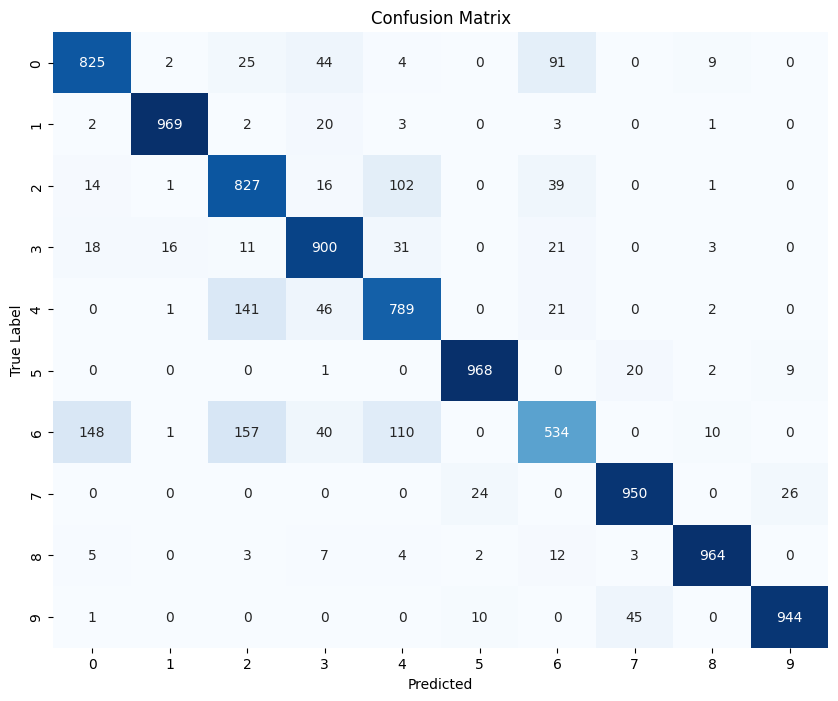

In [7]:
# Predict on the test set
y_pred = model.predict(x_test_flat)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [10]:
def most_confused_class(classes_number, conf_matrix):
  # Corrected logic to find the most confused classes
  for i in range(classes_number):
      conf_row = conf_matrix[i].copy()  # Copy the row to avoid changing the original matrix
      conf_row[i] = -1  # Set diagonal element to -1 to ignore it (so we can find the second-largest)
      most_confused_class_ = conf_row.argmax()  # Now find the argmax, ignoring diagonal
      print(f"Class {i} is most often ({conf_matrix[i][most_confused_class_]} times)"
       f"confused with Class {most_confused_class_}.")

  print("\n")

  # Identify the two classes most confused with each other
  max_confusion = 0
  confused_pair = (0, 0)
  for i in range(10):
      for j in range(10):
          if i != j and conf_matrix[i][j] + conf_matrix[j][i] > max_confusion:
              max_confusion = conf_matrix[i][j] + conf_matrix[j][i]
              confused_pair = (i, j)

  print(f"The two classes most confused with each other are: {confused_pair}")
  print(f"The two classes most confused with each other are: {max_confusion}")

In [11]:
# Find unique classes in the training labels
unique_classes = np.unique(y_train)
num_classes = unique_classes.size

most_confused_class(num_classes, conf_matrix)

Class 0 is most often (91 times)confused with Class 6.
Class 1 is most often (20 times)confused with Class 3.
Class 2 is most often (102 times)confused with Class 4.
Class 3 is most often (31 times)confused with Class 4.
Class 4 is most often (141 times)confused with Class 2.
Class 5 is most often (20 times)confused with Class 7.
Class 6 is most often (157 times)confused with Class 2.
Class 7 is most often (26 times)confused with Class 9.
Class 8 is most often (12 times)confused with Class 6.
Class 9 is most often (45 times)confused with Class 7.


The two classes most confused with each other are: (2, 4)
The two classes most confused with each other are: 243
